In [1]:
# import packages needed
from scipy import stats
from scipy import signal
from scipy.fftpack import fft, ifft
from statsmodels import tsa as TSA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import arima_process as ARIMA_process
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.api import qqplot
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

# Q1
(20%) Simulate three random variables with length 1024, following standard Normal, t-distribution (𝑑𝑓 =10), and exponential distribution (rate = 1.6), respectively. 
<br>
(a) Perform FFT (Fast Fourier Transform) over the three random variables and plot the amplitudes. 
<br>
(b) Perform STFT (Short-Time Fourier Transform) over the three random variables and plot the time-frequency contours. 
<br>
(c) What do you observe in (a) and (b)? 

# Answer
(a) The result is shown in the following cells.
<br>
(b) The result is shown in the following cells.
<br>
(c) According to the results from (a) and (b), we could observe that the wave consists of different cosine and sine waves in different amplitudes and frequencies, while only a few of them contribute a little bit more than others.

   randomVariable1  randomVariable2  randomVariable3
0        -0.025966         1.256335         0.420678
1         1.241580         1.945012        -1.220430
2         1.928526         1.252681         0.903007
3        -0.378396         0.029930         0.172530
4        -0.586273         0.332810         0.696389


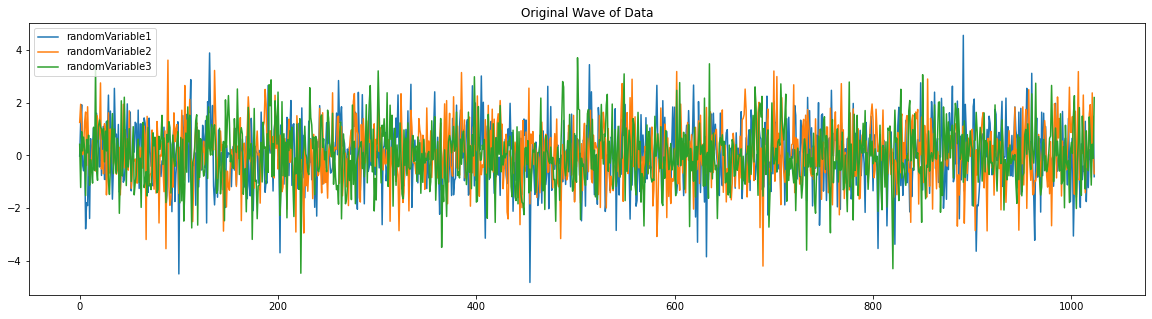

In [2]:
# create data for Q1

data_freedom = 10
sample_size = 1024
labels = ["randomVariable1", "randomVariable2", "randomVariable3"]

data_q1 = pd.DataFrame({
    labels[0]:np.random.standard_t(df=data_freedom, size=sample_size),
    labels[1]:np.random.standard_t(df=data_freedom, size=sample_size),
    labels[2]:np.random.standard_t(df=data_freedom, size=sample_size)
})

print(data_q1.head(5))


# construct plot for data
plt.figure(figsize=(20, 5))

for i, j in enumerate(labels):
    plt.plot(data_q1.iloc[:, i], label=j)

plt.legend(loc="upper left", frameon=True)
plt.title("Original Wave of Data")
plt.show()

In [3]:
# FFT function
# reference:　https://www.itread01.com/article/1532154074.html

def FFT_decomposition(y):
    yy=fft(y)      
    yreal = yy.real    
    yimag = yy.imag    
 
    yf=abs(fft(y))    
    yf1=abs(fft(y))/len(y)   
    yf2 = yf1[range(int(len(y)/2))] 
 
    xf = np.arange(len(y)) 
    xf1 = xf
    xf2 = xf[range(int(len(y)/2))] 
    
    # graphing part
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,5))
    figure.tight_layout(pad=2.0)

    plt.subplot(221)
    plt.plot(y)
    plt.title('Original Wave') 
    
    plt.subplot(222)
    plt.plot(xf,yf,'r')
    plt.title('FFT of Wave(two sides frequency range)') 
    
    plt.subplot(223)
    plt.plot(xf1,yf1,'g')
    plt.title('FFT of Wave(normalization)')
 
    plt.subplot(224)
    plt.plot(xf2,yf2,'b')
    plt.title('FFT of Wave')
    plt.show()
 

FFT Decomposition for randomVariable1


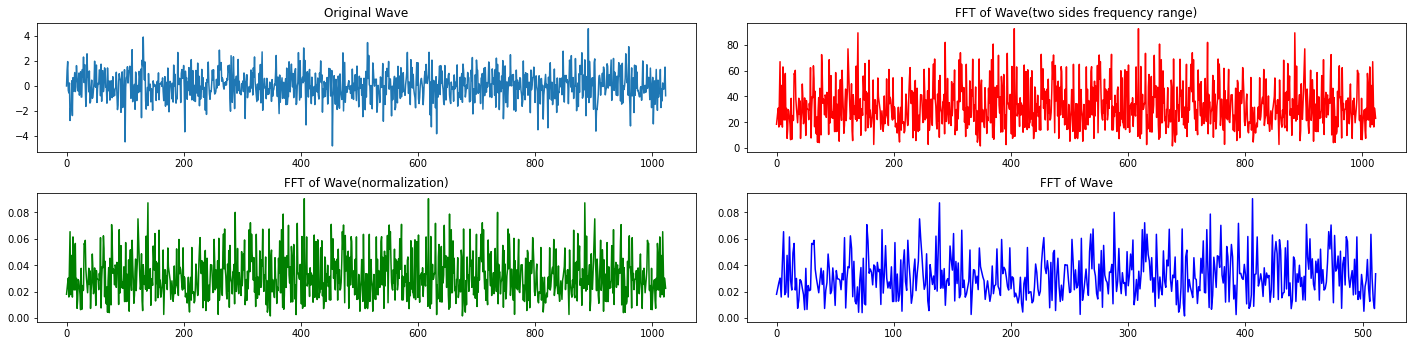



FFT Decomposition for randomVariable2


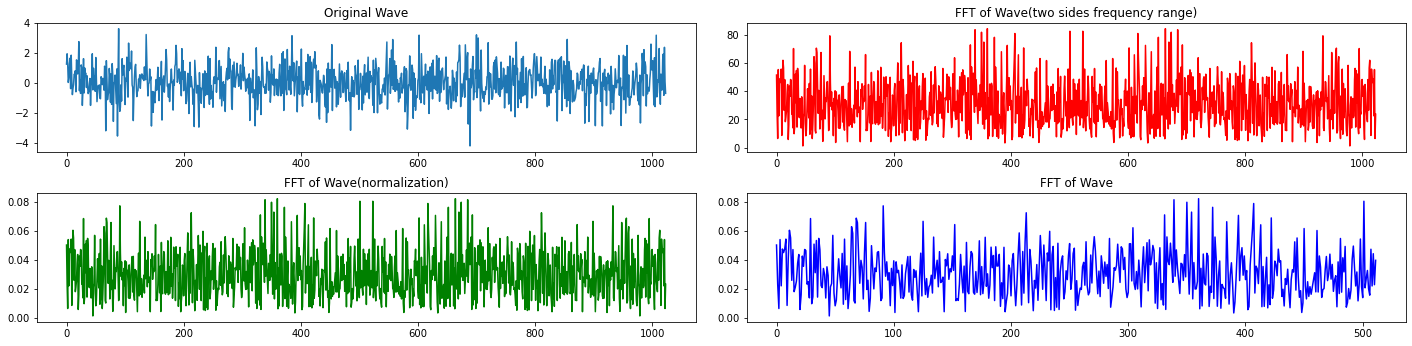



FFT Decomposition for randomVariable3


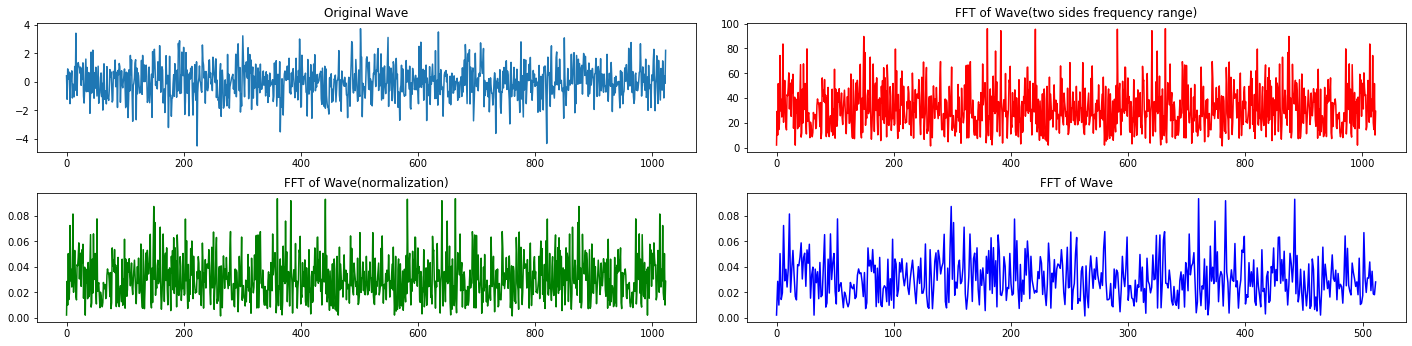

In [4]:
# (a) Perform FFT (Fast Fourier Transform) over the three random variables and plot the amplitudes.
  
print("FFT Decomposition for randomVariable1")
FFT_decomposition(data_q1.iloc[:, 0].tolist())

print("\n\nFFT Decomposition for randomVariable2")
FFT_decomposition(data_q1.iloc[:, 1].tolist())

print("\n\nFFT Decomposition for randomVariable3")
FFT_decomposition(data_q1.iloc[:, 2].tolist())

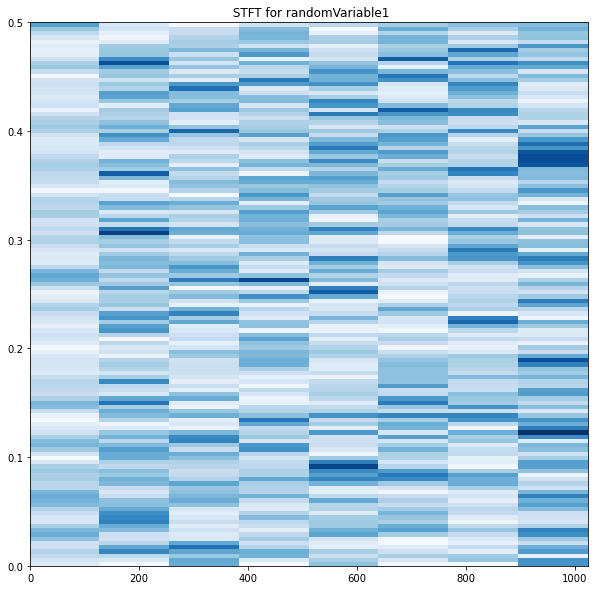

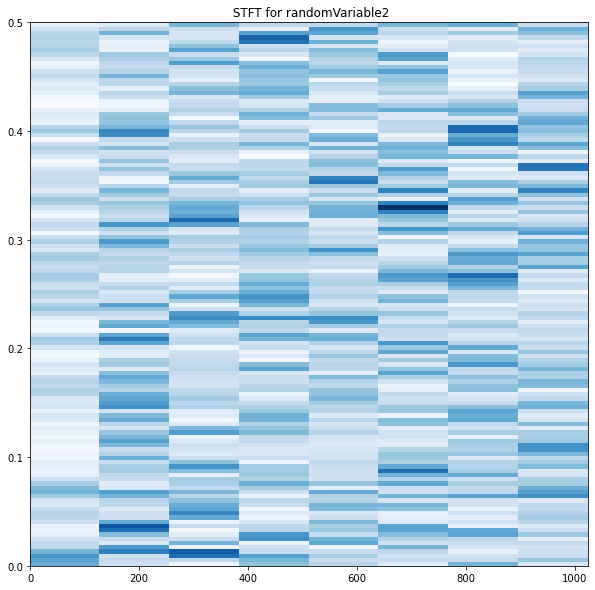

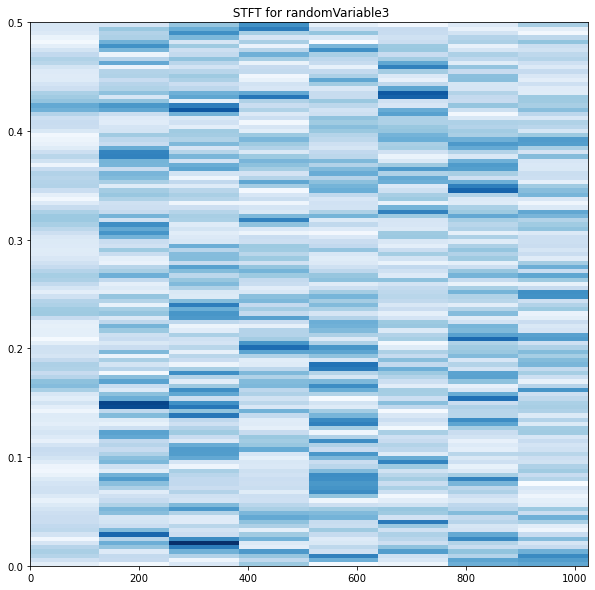

In [6]:
# (b) Perform STFT (Short-Time Fourier Transform) over the three random variables and plot the time-frequency contours.
# reference: https://stackoverflow.com/questions/43109708/how-to-plot-spectrogram-using-stft-in-python

cmap = cm.Blues
window = "hamming"
figsize = (10, 10)

f, t, Zxx = signal.stft(data_q1.iloc[:, 0].tolist(), fs=1)
plt.figure(figsize=figsize)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=cmap)
plt.title(" STFT for randomVariable1")
plt.show()

f, t, Zxx = signal.stft(data_q1.iloc[:, 1].tolist(), fs=1)
plt.figure(figsize=figsize)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=cmap)
plt.title(" STFT for randomVariable2")
plt.show()

f, t, Zxx = signal.stft(data_q1.iloc[:, 2].tolist(), fs=1)
plt.figure(figsize=figsize)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=cmap)
plt.title(" STFT for randomVariable3")
plt.show()

# Q2
(20%) Simulate a seasonal time series following the model SARIMA(2, 1, 0) × (0, 1, 1)12. 
<br>
(a) Perform FFT (Fast Fourier Transform) over the time series and plot the amplitudes. 
<br>
(b) Perform STFT (Short-Time Fourier Transform) over the time series and plot the time-frequency contours. 
<br>
(c) What do you observe in (a) and (b)? 

# Answer
(a) The result is shown in the following cells.
<br>
(b) The result is shown in the following cells.
<br>
(c) According to the results from (a) and (b), we could observe that within the SARIMA wave created by us, only cosine and sine waves with a few frequencies actually contibute to the wave itself, and this observation also shows in the STFT contour map created by us.

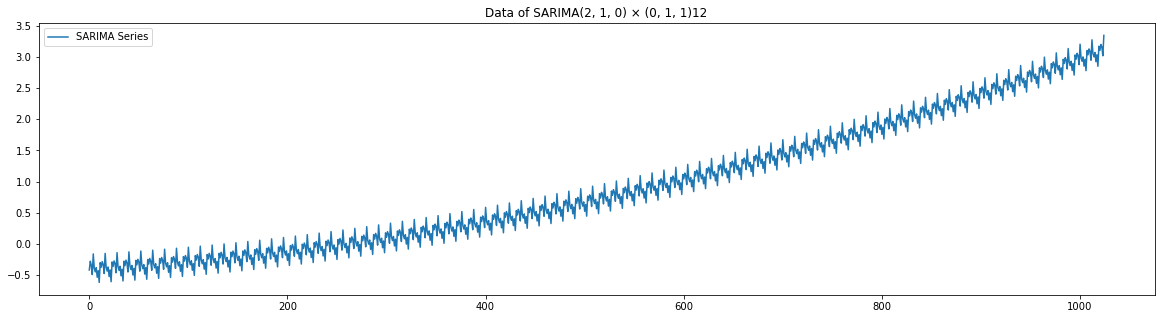

In [7]:
# generate sample by sarima
sample_size = 1024

# create a random sample first
data_q2 = np.random.randn(1024)

# fit with a SARIMA model
model=sm.tsa.statespace.SARIMAX(endog=data_q2,order=(2,1,0),seasonal_order=(0,1,1,12),trend='c',enforce_invertibility=False)
results=model.fit()

# get out-of-sample forcasting result by model
result_prediction = results.get_prediction(start=len(data_q2)+4, end=(len(data_q2)+4+sample_size))
samples_q2 = result_prediction.predicted_mean.tolist()

# fit again with sarima model to check residual
model=sm.tsa.statespace.SARIMAX(endog=samples_q2,order=(2,1,0),seasonal_order=(0,1,1,12),trend='c',enforce_invertibility=False)
results=model.fit()
# print(results.summary())

# eliminate with residual to get pure SARIMA sample
samples_q2 = [(j - results.params[0]) for i, j in enumerate(samples_q2)]

plt.figure(figsize=(20, 5))
plt.plot(samples_q2, label="SARIMA Series")
plt.legend(loc="upper left")
plt.title("Data of SARIMA(2, 1, 0) × (0, 1, 1)12")
plt.show()

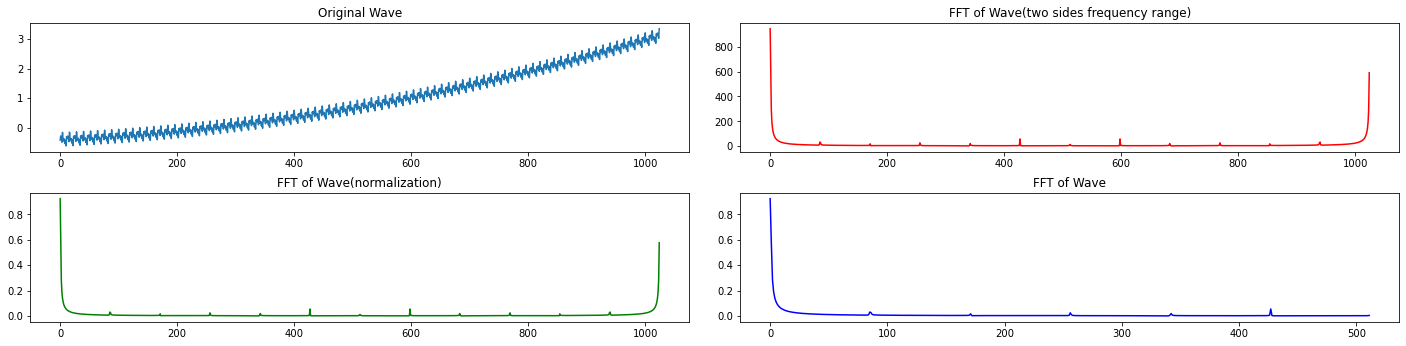

In [8]:
# (a) Perform FFT (Fast Fourier Transform) over the time series and plot the amplitudes.

FFT_decomposition(samples_q2)

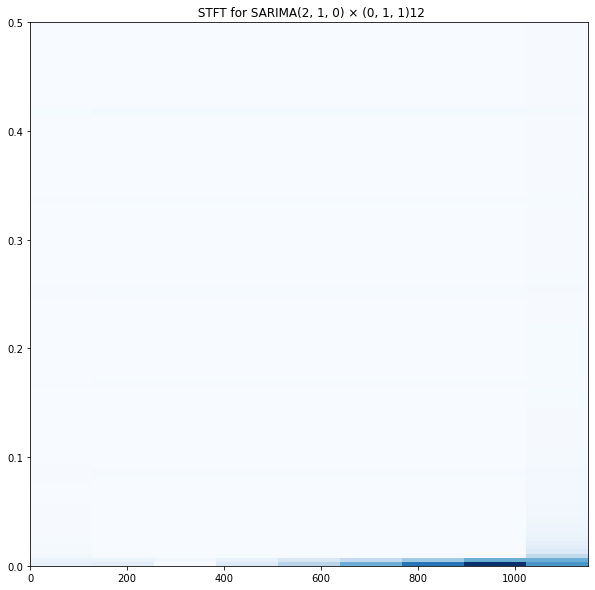

In [9]:
# (b) Perform STFT (Short-Time Fourier Transform) over the time series and plot the time-frequency contours.
cmap = cm.Blues
window = "hamming"
figsize = (10, 10)

f, t, Zxx = signal.stft(samples_q2, fs=1)
plt.figure(figsize=figsize)
plt.pcolormesh(t, f, np.abs(Zxx), cmap=cmap)
plt.title(" STFT for SARIMA(2, 1, 0) × (0, 1, 1)12")
plt.show()